In [45]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np  
import csv 
import datetime as dt

In [46]:
zillow_11 = pd.read_csv('./Resources/Zip_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_11.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,3448246.0,3435998.0,3395436.0,3357463.0,3357765.0,3416324.0,3469544.0,3484173.0,3510843.0,3586703.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,NaN,...,1515372.0,1512706.0,1509594.0,1507032.0,1507035.0,1508901.0,1511288.0,1512041.0,1511849.0,1512165.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,10200000.0,10100000.0,10100000.0,10100000.0,10200000.0,10100000.0,9884157.0,9684741.0,9568966.0,9571718.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,249879.0,...,465177.0,465458.0,465855.0,466333.0,466032.0,466292.0,467250.0,468965.0,470630.0,471645.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,735019.0,...,1948791.0,1943860.0,1936691.0,1932635.0,1929663.0,1932982.0,1934695.0,1935368.0,1933888.0,1936368.0
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,125650.0,...,227285.0,227512.0,228683.0,229982.0,230665.0,231093.0,232282.0,233769.0,234656.0,235054.0
6,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,134071.0,...,245648.0,246159.0,247228.0,248313.0,248786.0,249332.0,250468.0,251636.0,252444.0,252709.0
7,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,175495.0,...,276744.0,276231.0,276205.0,277417.0,278646.0,279670.0,279803.0,279387.0,278320.0,277014.0
8,84640,9,60640,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,319851.0,...,1169516.0,1165661.0,1161165.0,1157192.0,1155245.0,1154816.0,1155106.0,1152653.0,1153005.0,1150087.0
9,62037,10,11226,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,NaN,...,1572176.0,1576771.0,1580030.0,1585439.0,1582513.0,1581587.0,1583231.0,1588249.0,1591833.0,1591127.0


In [47]:
df_5bdr=pd.melt(zillow_11,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City','Metro', 'CountyName']) 
df_5bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,NaN
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,NaN
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,NaN
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,249879.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,735019.0
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,125650.0
6,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,134071.0
7,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,1/31/1996,175495.0
8,84640,9,60640,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,319851.0
9,62037,10,11226,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,1/31/1996,NaN


In [48]:
df_5bdr["type"]="5-bdr"
df_5bdr["variable"]=df_5bdr["variable"].astype('datetime64[m]')
df_5bdr["epoch"] = (df_5bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()
df_5bdr=df_5bdr.dropna(how="any")
df_5bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,249879.0,5-bdr,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,735019.0,5-bdr,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,125650.0,5-bdr,8.230464e+08
6,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,134071.0,5-bdr,8.230464e+08
7,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,1996-01-31,175495.0,5-bdr,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592651,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2020-06-30,1194706.0,5-bdr,1.593475e+09
6592652,59376,34430,4109,Zip,ME,ME,Portland,Portland-South Portland,Cumberland County,2020-06-30,880405.0,5-bdr,1.593475e+09
6592653,59316,34430,4033,Zip,ME,ME,Cumberland,Portland-South Portland,Cumberland County,2020-06-30,1026942.0,5-bdr,1.593475e+09
6592654,95851,34430,89155,Zip,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,2020-06-30,430695.0,5-bdr,1.593475e+09


In [49]:
X11=df_5bdr["variable"].values.reshape(-1,1)
y11=df_5bdr["value"].values.reshape(-1,1)

X22=df_5bdr["epoch"].values.reshape(-1,1)
y22=df_5bdr["value"].values.reshape(-1,1)

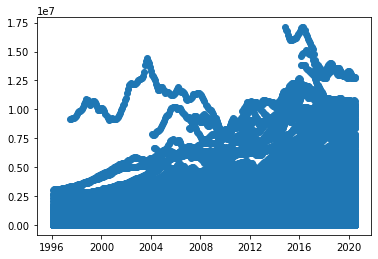

In [50]:
plt.scatter(X11,y11)

In [51]:
# Prediction 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X22, y22, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
model
X_test

array([[1.5750720e+09],
       [1.4831424e+09],
       [1.4014944e+09],
       ...,
       [1.5565824e+09],
       [1.2595392e+09],
       [1.2463200e+09]])

In [53]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 182086783394.91724
R-squared (R2 ): 0.01466652222324416


In [54]:
model.predict(np.array([1596662122]).reshape(-1, 1))

array([[444886.46524572]])

SCHOOL DATA

In [55]:
schools_data= pd.read_csv('./Resources/number-of-schools.csv')
schools_data.head(10)

,index,objectid,city,state,zip,county
0,0,2002,NEW SMYRNA,FL,32168,VOLUSIA
1,1,2003,WOODWORTH,LA,71485,RAPIDES
2,2,2004,BRUNSWICK,ME,4011,CUMBERLAND
3,3,2005,CARTHAGE,MS,39051,LEAKE
4,4,2006,KEARNEY,MO,64060,CLAY
5,5,2007,LINCOLN,NE,68516,LANCASTER
6,6,2008,LAS VEGAS,NV,89121,CLARK
7,7,2009,LAS VEGAS,NV,89141,CLARK
8,8,2010,ATLANTIC CITY,NJ,8401,ATLANTIC
9,9,2011,WESTFIELD,NJ,7090,UNION


In [56]:
nc_schools=schools_data[schools_data['state']=='NC']

In [57]:
nc_schools_df=nc_schools.groupby("zip")["objectid"].count().reset_index(name="count")
nc_schools_df

,zip,count
0,27006,2
1,27011,3
2,27012,4
3,27013,2
4,27014,1
...,...,...
620,28806,12
621,28901,3
622,28904,3
623,28905,1


In [58]:
nc_df_5bdr=df_5bdr[df_5bdr['State']=='NC']
nc_df_5bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
30,69816,33,28269,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,208878.0,5-bdr,823046400.0
53,69823,56,28277,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,328832.0,5-bdr,823046400.0
83,69672,86,28027,Zip,NC,NC,Concord,Charlotte-Concord-Gastonia,Cabarrus County,1996-01-31,207069.0,5-bdr,823046400.0
182,69699,186,28078,Zip,NC,NC,Huntersville,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,258792.0,5-bdr,823046400.0
190,69340,194,27410,Zip,NC,NC,Greensboro,Greensboro-High Point,Guilford County,1996-01-31,241021.0,5-bdr,823046400.0
196,69336,200,27406,Zip,NC,NC,Greensboro,Greensboro-High Point,Guilford County,1996-01-31,185261.0,5-bdr,823046400.0
211,69849,215,28314,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,1996-01-31,169930.0,5-bdr,823046400.0
317,69275,321,27284,Zip,NC,NC,Kernersville,Winston-Salem,Forsyth County,1996-01-31,200285.0,5-bdr,823046400.0
400,69768,404,28205,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,264356.0,5-bdr,823046400.0
409,70056,412,28601,Zip,NC,NC,Hickory,Hickory-Lenoir-Morganton,Catawba County,1996-01-31,235166.0,5-bdr,823046400.0


In [59]:
nc_df_5bdr=nc_df_5bdr.groupby(["City","RegionName"])["value"].mean().reset_index(name="avg")
nc_df_5bdr

,City,RegionName,avg
0,Aberdeen,28315,256666.107143
1,Advance,27006,420614.217391
2,Albemarle,28001,193832.969388
3,Alexander,28701,387356.405797
4,Alexis,28006,327069.064516
...,...,...,...
540,Yadkinville,27055,239051.993333
541,Youngsville,27596,290807.523810
542,Zebulon,27597,228846.389078
543,Zionville,28698,852329.142857


In [60]:
merge_data=pd.merge(nc_df_5bdr,nc_schools_df,left_on="RegionName",right_on="zip")

In [61]:
merge_data["City"] = merge_data["City"].astype('category')

In [62]:
merge_data["City"] = merge_data["City"].cat.codes

In [63]:
merge_data

,City,RegionName,avg,zip,count
0,0,28315,2.566661e+05,28315,4
1,1,27006,4.206142e+05,27006,2
2,2,28001,1.938330e+05,28001,8
3,3,27501,2.580105e+05,27501,5
4,4,27502,3.770457e+05,27502,7
...,...,...,...,...,...
466,347,28480,1.574379e+06,28480,1
467,348,27055,2.390520e+05,27055,4
468,349,27596,2.908075e+05,27596,3
469,350,27597,2.288464e+05,27597,5


In [64]:
X=merge_data["City"].values.reshape(-1,1)
y=merge_data["avg"].values.reshape(-1,1)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [66]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [67]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.025075372126908357
Testing Score: -0.05654161696538562


Mean Squared Error (MSE): 36616768544.29475
R-squared (R2 ): -0.05654161696538562


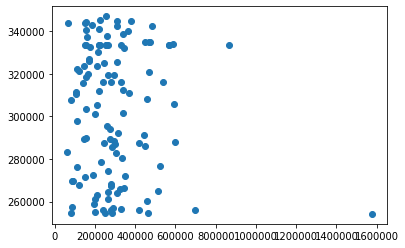

In [68]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION
plt.scatter(y_test,predicted)

Text(0.5, 1.0, 'Residual Plot')

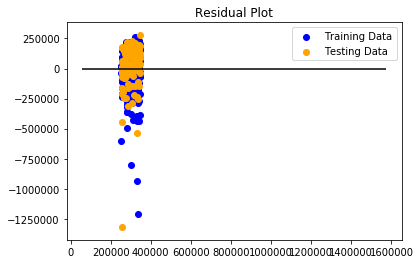

In [69]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

INCOME DATA

In [70]:
income_data = pd.read_csv('./Resources/rw_census_data.csv')
income_data.head(10)

,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,601,62.475351
1,38442.0,19611.0,16358.0,602,51.014515
2,48814.0,24337.0,16603.0,603,49.856599
3,6437.0,4163.0,12832.0,606,64.672984
4,27073.0,11724.0,19309.0,610,43.305138
5,60303.0,28547.0,18171.0,612,47.339270
6,10765.0,5388.0,16018.0,616,50.051092
7,23974.0,11879.0,16735.0,617,49.549512
8,6578.0,3309.0,15206.0,622,50.304044
9,42427.0,22617.0,16280.0,623,53.308035


In [71]:
merge_data2=pd.merge(merge_data,income_data,left_on="RegionName",right_on="zipcode")

merge_data2

,City,RegionName,avg,zip,count,population,poverty_count,median_household_income,zipcode,poverty_rate
0,0,28315,2.566661e+05,28315,4,13700.0,2826.0,51725.0,28315,20.627737
1,1,27006,4.206142e+05,27006,2,14555.0,932.0,78095.0,27006,6.403298
2,2,28001,1.938330e+05,28001,8,26601.0,5208.0,45121.0,28001,19.578211
3,3,27501,2.580105e+05,27501,5,21299.0,2601.0,56338.0,27501,12.211841
4,4,27502,3.770457e+05,27502,7,40280.0,2248.0,110513.0,27502,5.580933
...,...,...,...,...,...,...,...,...,...,...
466,347,28480,1.574379e+06,28480,1,2536.0,216.0,83417.0,28480,8.517350
467,348,27055,2.390520e+05,27055,4,14131.0,1855.0,44574.0,27055,13.127167
468,349,27596,2.908075e+05,27596,3,18359.0,1624.0,70535.0,27596,8.845798
469,350,27597,2.288464e+05,27597,5,23538.0,2995.0,58514.0,27597,12.724106


In [72]:
X=merge_data2[["City","population","median_household_income", "count", "poverty_rate"]]
y=merge_data2["avg"].values.reshape(-1,1)

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [75]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2551783853053936
Testing Score: -1687441.0718447112


In [76]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 4.707297312281571e+16
R-squared (R2 ): -1687441.0718447112


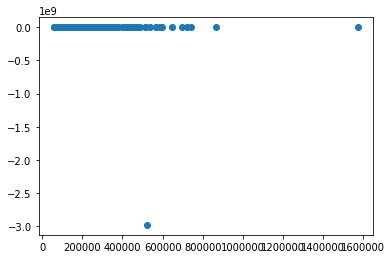

In [77]:
plt.scatter(y_test,predicted)

In [78]:
y_test

array([[ 469885.60750853],
       [ 867579.36394558],
       [ 362296.90740741],
       [ 239949.48529412],
       [ 200103.84848485],
       [ 592818.98615917],
       [ 103154.45454545],
       [ 226773.18539326],
       [ 229441.44274809],
       [ 155125.34013605],
       [ 221768.79931973],
       [ 290656.27040816],
       [ 324200.335     ],
       [ 456652.74489796],
       [ 248174.02040816],
       [ 209092.24829932],
       [ 155782.97435897],
       [ 341737.45578231],
       [ 263747.66666667],
       [ 224243.15306122],
       [ 256666.10714286],
       [1574379.17460317],
       [ 309547.90877193],
       [ 340764.49519231],
       [ 256989.93877551],
       [ 368927.79359431],
       [  88032.33992095],
       [ 218627.49319728],
       [ 220017.70588235],
       [ 330147.09137056],
       [ 171882.98130841],
       [ 155988.77102804],
       [ 213872.57575758],
       [ 346071.00340136],
       [  64389.75641026],
       [ 336982.39673913],
       [ 151464.39115646],
 

In [79]:
predicted

array([[ 4.96624599e+05],
       [ 4.53593400e+05],
       [ 3.10527061e+05],
       [ 3.39529914e+05],
       [ 2.20693663e+05],
       [ 3.33305569e+05],
       [ 1.97526966e+05],
       [ 3.50200909e+05],
       [ 2.98776133e+05],
       [ 2.09108829e+05],
       [ 2.85835288e+05],
       [ 2.64862198e+05],
       [ 2.65413714e+05],
       [ 2.97993481e+05],
       [ 3.64128354e+05],
       [ 1.89078483e+05],
       [ 1.95874598e+05],
       [ 4.51980783e+05],
       [ 2.51097543e+05],
       [ 2.80418802e+05],
       [ 3.30969526e+05],
       [ 4.15534567e+05],
       [ 2.95525031e+05],
       [ 3.03715935e+05],
       [ 3.44299890e+05],
       [ 3.65390153e+05],
       [ 1.37825973e+05],
       [ 2.77472221e+05],
       [ 3.00273642e+05],
       [ 2.38905838e+05],
       [ 2.55780283e+05],
       [ 2.35875029e+05],
       [ 2.55555113e+05],
       [ 3.20546056e+05],
       [ 2.80461558e+05],
       [ 2.96055800e+05],
       [ 1.96273585e+05],
       [ 3.13763945e+05],
       [ 4.4

In [80]:
merge_data2.to_csv('merged_data.csv', index=False, header=True)

Text(0.5, 1.0, 'Residual Plot')

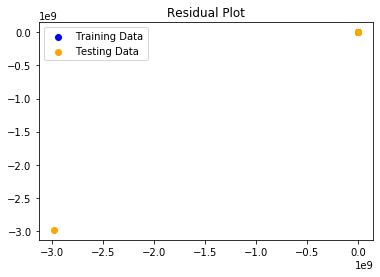

In [81]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")